In [2]:
import torch.nn as nn

In [3]:
from model import Trainer

In [4]:
cfg = {
    "data_path": "C:/Users/seanh/Desktop/E4E/maestro/data/DeepFish/Classification",
    "model_name": "efficientnet_b0",
    "model_checkpoint": "model.pt",
    "learning_rate": 0.001
}

In [5]:
import pandas as pd

In [6]:
df = pd.read_csv("C:/Users/seanh/Desktop/E4E/maestro/data/DeepFish/Classification/classification.csv")
df = df.sample(frac = 1)
df["file"] = df["ID"] + ".jpg"
df

,ID,habitats,labels,classes,frames,file
13625,7426/valid/7426_F3_f000035,7426,1,valid,7426_F3_f000035,7426/valid/7426_F3_f000035.jpg
26181,7490/valid/7490_F4_f000159,7490,1,valid,7490_F4_f000159,7490/valid/7490_F4_f000159.jpg
24443,7482/valid/7482_F2_f000591,7482,1,valid,7482_F2_f000591,7482/valid/7482_F2_f000591.jpg
2675,7268/valid/7268_F1_f000556,7268,1,valid,7268_F1_f000556,7268/valid/7268_F1_f000556.jpg
18005,7463/empty/7463_NF4_f000665,7463,0,empty,7463_NF4_f000665,7463/empty/7463_NF4_f000665.jpg
...,...,...,...,...,...,...
17326,7463/empty/7463_NF3_f000461,7463,0,empty,7463_NF3_f000461,7463/empty/7463_NF3_f000461.jpg
35029,9894/empty/9894_no_fish_2_f000113,9894,0,empty,9894_no_fish_2_f000113,9894/empty/9894_no_fish_2_f000113.jpg
28084,7585/empty/7585_NF2_f000876,7585,0,empty,7585_NF2_f000876,7585/empty/7585_NF2_f000876.jpg
33375,9866/valid/9866_acanthopagrus_and_caranx_f000204,9866,1,valid,9866_acanthopagrus_and_caranx_f000204,9866/valid/9866_acanthopagrus_and_caranx_f0002...


In [7]:
df["labels"].value_counts(), df.shape, 22357 + 17409

(labels
 0    22357
 1    17409
 Name: count, dtype: int64,
 (39766, 6),
 39766)

In [8]:
 from tqdm import tqdm

In [9]:
trainer = Trainer(cfg, ["hi"])
trainer.build()


c:\Users\seanh\Desktop\E4E\maestro\model_trainer\model_trainer\model.py:85: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.checkpoint = torch.load(cfg["model_checkpoint"

In [10]:
num_errors = 0
loss = []
data = []
for index, row in tqdm(df.iterrows()):
    data.append({
        "file_path": row["file"],
        "label": row["labels"]
    })
    if len(data) >= 2:
        trainer = Trainer(cfg, data)
        trainer.build()
        loss.append(trainer.train())
        del trainer
        data = []
    
    

923it [1:48:29,  7.05s/it]


KeyboardInterrupt: 

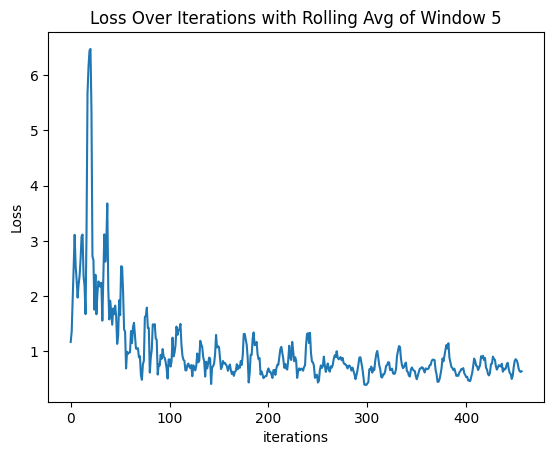

In [14]:
# importing required packages 
import numpy as np
import matplotlib.pyplot as plt
# To generate random data for plotting
axisX = np.linspace(1, 15, 50)
axisY = np.sin(axisX)
# To create the line graph from above data
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w
plt.plot(moving_average(loss, 5))
# Adding title and labels for the graph
plt.title('Loss Over Iterations with Rolling Avg of Window 5')
plt.xlabel('iterations')
plt.ylabel('Loss')
# to show the final graph
plt.show()